# FTP NOAA

## Get AR IDs

In [11]:
from ftplib import FTP
from sunpy.io.special import srs

In [10]:
with FTP("ftp.swpc.noaa.gov") as ftp:
    ftp.login()
    ftp.cwd('pub/warehouse/2024/SRS/')
    ftp.dir()

-rw-r--r--   1 ftp      ftp           753 Jan  1 00:30 20240101SRS.txt
-rw-r--r--   1 ftp      ftp           732 Jan  2 00:30 20240102SRS.txt
-rw-r--r--   1 ftp      ftp           744 Jan  3 00:30 20240103SRS.txt
-rw-r--r--   1 ftp      ftp           759 Jan  4 01:05 20240104SRS.txt
-rw-r--r--   1 ftp      ftp           771 Jan  5 00:30 20240105SRS.txt
-rw-r--r--   1 ftp      ftp           930 Jan  6 00:30 20240106SRS.txt
-rw-r--r--   1 ftp      ftp           941 Jan  7 00:30 20240107SRS.txt
-rw-r--r--   1 ftp      ftp          1010 Jan  8 00:30 20240108SRS.txt
-rw-r--r--   1 ftp      ftp           978 Jan  9 00:30 20240109SRS.txt
-rw-r--r--   1 ftp      ftp          1058 Jan 10 00:30 20240110SRS.txt
-rw-r--r--   1 ftp      ftp          1029 Jan 11 00:30 20240111SRS.txt
-rw-r--r--   1 ftp      ftp          1041 Jan 12 00:30 20240112SRS.txt
-rw-r--r--   1 ftp      ftp          1165 Jan 13 00:30 20240113SRS.txt
-rw-r--r--   1 ftp      ftp          1157 Jan 14 00:30 20240114SRS.txt
-rw-r-

In [12]:
latest = '/pub/latest/SRS.txt'

filename = 'pub/warehouse/2024/SRS/20240323SRS.txt'

with FTP("ftp.swpc.noaa.gov") as ftp:
    ftp.login()
    
    file_contents = []
    ftp.retrlines('RETR '+filename, file_contents.append)
    
    header, section_lines, supplementary_lines = srs.split_lines(file_contents)

    srs_table = srs.make_table(header, section_lines, supplementary_lines)

In [13]:
file_contents

[':Product: 0323SRS.txt',
 ':Issued: 2024 Mar 23 0030 UTC',
 '# Prepared jointly by the U.S. Dept. of Commerce, NOAA,',
 '# Space Weather Prediction Center and the U.S. Air Force.',
 '#',
 'Joint USAF/NOAA Solar Region Summary',
 'SRS Number 83 Issued at 0030Z on 23 Mar 2024',
 'Report compiled from data received at SWO on 22 Mar',
 '# I.  Regions with Sunspots.  Locations Valid at 22/2400Z ',
 'Nmbr Location  Lo  Area  Z   LL   NN Mag Type',
 '3607 S18W91   318  0150 Dso  06   02 Beta',
 '3608 N11W81   308  0010 Bxo  05   02 Beta',
 '3614 N17E03   224  0210 Dso  05   04 Beta',
 '3615 S13E10   217  0370 Ekc  15   52 Beta-Gamma-Delta',
 '3616 N03W88   315  0010 Bxo  03   01 Beta',
 '3617 S14E41   186  0100 Cao  06   06 Beta',
 '3618 S19W77   304  0100 Cao  10   06 Beta',
 '3619 N20E46   181  0100 Cao  06   05 Beta',
 '3620 S10E74   153  0030 Cro  02   03 Beta',
 '# IA. H-alpha Plages without Spots.  Locations Valid at 22/2400Z Mar',
 'Nmbr  Location  Lo',
 '3609  N06W82   309',
 '3610  

In [14]:
srs_table

ID,Number,Carrington Longitude,Area,Z,Longitudinal Extent,Number of Sunspots,Mag Type,Latitude,Longitude
,,deg,uSH,,deg,,,deg,deg
str2,int32,float64,float64,str3,float64,int32,str16,float64,float64
I,13607,318.0,150.0,Dso,6.0,2,Beta,-18.0,91.0
I,13608,308.0,10.0,Bxo,5.0,2,Beta,11.0,81.0
I,13614,224.0,210.0,Dso,5.0,4,Beta,17.0,-3.0
I,13615,217.0,370.0,Ekc,15.0,52,Beta-Gamma-Delta,-13.0,-10.0
I,13616,315.0,10.0,Bxo,3.0,1,Beta,3.0,88.0
I,13617,186.0,100.0,Cao,6.0,6,Beta,-14.0,-41.0
I,13618,304.0,100.0,Cao,10.0,6,Beta,-19.0,77.0
I,13619,181.0,100.0,Cao,6.0,5,Beta,20.0,-46.0


In [15]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

from datetime import datetime

import matplotlib.pyplot as plt

import numpy as np
import sunpy.map

date_str = '2024 Mar 23 0000 UTC'
date_obs = datetime.strptime(date_str, '%Y %b %d %H%M %Z')

In [16]:
data = np.full((10, 10), np.nan)

# Define a reference coordinate and create a header using sunpy.map.make_fitswcs_header
skycoord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=date_obs,
                    observer='earth', frame=frames.Helioprojective)

# Scale set to the following for solar limb to be in the field of view
header = sunpy.map.make_fitswcs_header(data, skycoord, scale=[220, 220]*u.arcsec/u.pixel)

# Use sunpy.map.Map to create the blank map
blank_map = sunpy.map.Map(data, header)

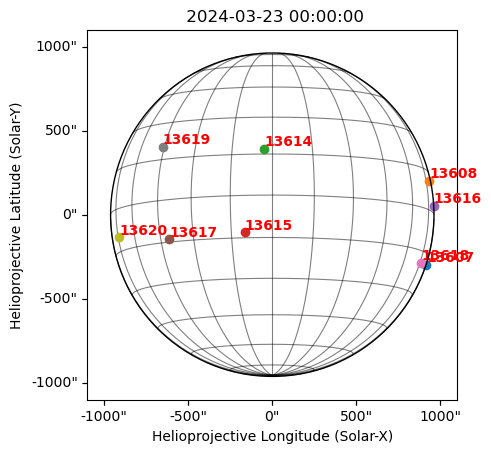

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection=blank_map)
blank_map.plot(axes=ax)
blank_map.draw_limb(axes=ax, color="k")
blank_map.draw_grid(axes=ax, color="k")

    
for region in srs_table[srs_table['ID']=='I']:
    ax.plot_coord(
        SkyCoord(region['Longitude'],
                 region['Latitude'], 
                 obstime=date_obs, 
                 observer='earth', 
                 frame=frames.HeliographicStonyhurst,
                 ).transform_to(blank_map.coordinate_frame), 'o')
    
    ax.annotate( region['Number'],
                (region['Longitude'].value, region['Latitude'].value),
                xycoords=ax.get_transform('heliographic_stonyhurst'),
                color='red',
                fontweight='bold',
                horizontalalignment='left', verticalalignment='bottom')